# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Main observations
* There is an inverse relationship between the temperature and latitude location.
* The higher temperature was found in cities with a latitude range between 0 and 20.
* There is not a particular relationship between humidity (%) and latitude.
* There is also no relationship between the cloudiness vs. latitude.
* Even though there is also no relationship between the winds speed vs. latitude, it is noticeable that almost all the cities as a wind speed between 0 and 5 mph.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

#Import dependencies to convert UTC to date time
import time
import datetime as dt
from dateutil.tz import gettz

# Import API key
import api_keys
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
import openweathermapy as ow

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
np.random.seed(5)
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

749

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
# Save config information.
settings = {"units": "metric", "appid": api_key}
weather_data= pd.DataFrame(columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng",\
                                   "Max Temp", "Wind Speed"])
index = 0

In [23]:
#Retrieve from the OpenWeatherMap API weather information from each country.
#If the country is not found the algorithm skip it.

for city in cities: 
    try:
        raw_data = ow.get_current(city, **settings) 
 
        print(f"Processing record {index} of City {city}")
        
        weather_data.loc[index, "City"]= city
        weather_data.loc[index, "Cloudiness"]= raw_data['clouds']['all']
        weather_data.loc[index, "Country"]= raw_data['sys']['country']
        weather_data.loc[index, "Date"] = raw_data['dt']
        weather_data.loc[index, "Humidity"]= raw_data['main']['humidity']
        weather_data.loc[index, "Lat"]= raw_data['coord']['lat']
        weather_data.loc[index, "Lng"]= raw_data['coord']['lon']
        weather_data.loc[index, "Max Temp"]= raw_data['main']['temp_max']
        weather_data.loc[index, "Wind Speed"]= raw_data['wind']['speed']
        
        index = index + 1
        
    except:
        print(f"City {city} not found....Skipping")

print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Processing record 0 of City busselton
Processing record 1 of City hofn
Processing record 2 of City east london
City belushya guba not found....Skipping
Processing record 3 of City kindu
Processing record 4 of City kapaa
Processing record 5 of City dingle
Processing record 6 of City atuona
Processing record 7 of City ahipara
Processing record 8 of City port elizabeth
Processing record 9 of City ushuaia
Processing record 10 of City tyup
Processing record 11 of City gizo
City attawapiskat not found....Skipping
Processing record 12 of City jamestown
Processing record 13 of City puerto ayora
Processing record 14 of City vaini
Processing record 15 of City san quintin
Processing record 16 of City puerto madero
Processing record 17 of City faya
Processing record 18 of City rikitea
Processing record 19 of City lebu
Processing record 20 of City avarua
Processing record 21 of City hobart
Processing record 22 of City mataura
Processing record 23 of City dikson
Processing record 24 of City saskylak

Processing record 193 of City poum
Processing record 194 of City yakima
City kamenskoye not found....Skipping
Processing record 195 of City yeppoon
Processing record 196 of City san ramon de la nueva oran
Processing record 197 of City matay
Processing record 198 of City mandurah
Processing record 199 of City kapit
Processing record 200 of City katsuura
Processing record 201 of City luderitz
City bur gabo not found....Skipping
Processing record 202 of City klaksvik
Processing record 203 of City suclayin
City dinsor not found....Skipping
City ondorhaan not found....Skipping
Processing record 204 of City yellowknife
Processing record 205 of City pangnirtung
Processing record 206 of City richards bay
Processing record 207 of City ginda
Processing record 208 of City palmer
City formoso do araguaia not found....Skipping
Processing record 209 of City hasaki
Processing record 210 of City fort saint james
Processing record 211 of City dunedin
Processing record 212 of City tiksi
Processing recor

City acarau not found....Skipping
Processing record 378 of City mozarlandia
Processing record 379 of City eureka
Processing record 380 of City shu
Processing record 381 of City fayaoue
Processing record 382 of City lubao
Processing record 383 of City praia da vitoria
Processing record 384 of City garcia
Processing record 385 of City awka
Processing record 386 of City champerico
Processing record 387 of City carmarthen
Processing record 388 of City katakwi
Processing record 389 of City kaili
Processing record 390 of City codrington
Processing record 391 of City pochutla
Processing record 392 of City alice springs
Processing record 393 of City lancaster
Processing record 394 of City elblag
Processing record 395 of City kulhudhuffushi
Processing record 396 of City nouakchott
Processing record 397 of City caravelas
Processing record 398 of City sladkovo
Processing record 399 of City sao filipe
Processing record 400 of City jieshi
Processing record 401 of City gamboma
Processing record 402 

Processing record 577 of City galle
Processing record 578 of City moyale
Processing record 579 of City barra
Processing record 580 of City tooele
Processing record 581 of City brest
Processing record 582 of City ishigaki
Processing record 583 of City ous
Processing record 584 of City limbang
Processing record 585 of City dubbo
Processing record 586 of City merrill
Processing record 587 of City nenjiang
Processing record 588 of City kawalu
Processing record 589 of City solnechnyy
Processing record 590 of City stromness
Processing record 591 of City turbat
Processing record 592 of City bedford
Processing record 593 of City dagua
Processing record 594 of City banepa
Processing record 595 of City west bay
Processing record 596 of City hay river
Processing record 597 of City tungor
Processing record 598 of City necochea
Processing record 599 of City morristown
Processing record 600 of City vanimo
Processing record 601 of City tevaitoa
Processing record 602 of City aleksandrovsk-sakhalinskiy

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
weather_data.to_csv("../Resources/Weather_Data.csv",
                  encoding="utf-8", index=False, header=True)

In [25]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,24,AU,1554150046,66,-33.64,115.35,16.67,3.58
1,hofn,90,IS,1554145200,100,64.25,-15.21,1,4.6
2,east london,32,ZA,1554150235,100,-33.02,27.91,19.06,10.88
3,kindu,64,CD,1554150236,83,-2.95,25.92,24.51,1.58
4,kapaa,1,US,1554149900,64,22.08,-159.32,25,2.78


In [26]:
#Convert from UTC time to date time
d = weather_data.loc[0,"Date"]

datetime = dt.datetime.fromtimestamp(d, gettz("Mexico"))
date = datetime.isoformat()

#Split date from hours and keep date
date_split= date.split('T')
date = date_split[0]
date

'2019-04-01'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

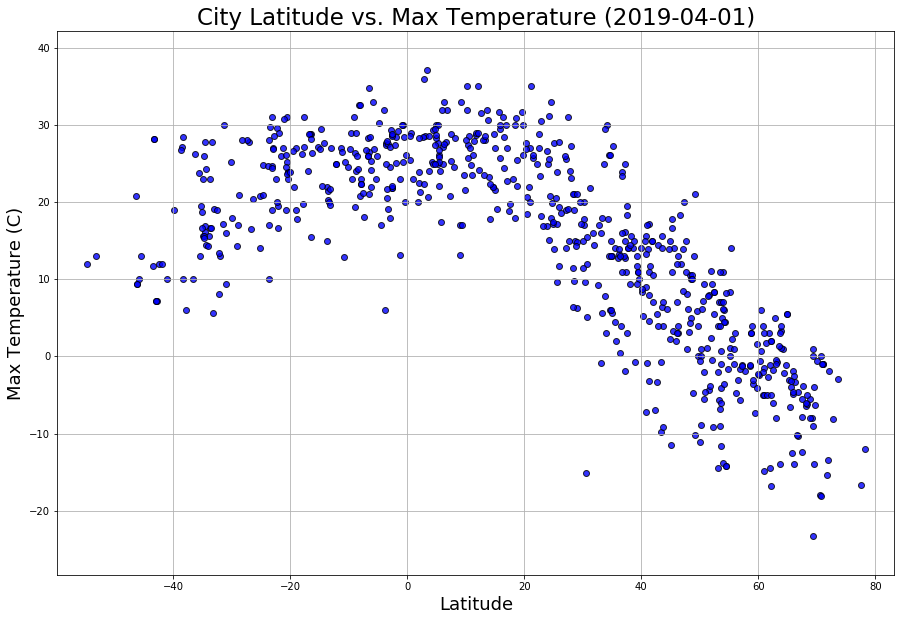

In [27]:
plt.figure(figsize=(15, 10))
plt.scatter(weather_data["Lat"].values, weather_data["Max Temp"].values,\
                        c="Blue", alpha=0.8, linewidth=1,\
                       edgecolors="black", cmap=weather_data["City"].values, marker="o" )

plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({date})", fontsize=23)
plt.xlabel("Latitude", fontsize=18)
plt.ylabel("Max Temperature (C)", fontsize=18)

plt.xlim(min(weather_data["Lat"].values)-5, max(weather_data["Lat"].values)+5)
plt.ylim(min(weather_data["Max Temp"].values)-5, max(weather_data["Max Temp"].values)+5)

plt.savefig("../images/City_Latitud_vs_Max_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

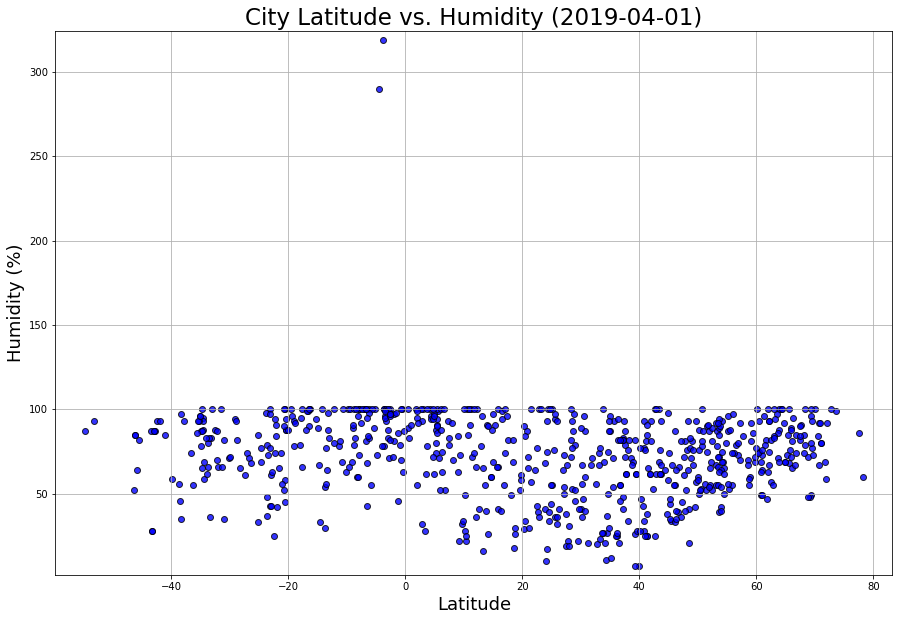

In [28]:
plt.figure(figsize=(15, 10))
plt.scatter(weather_data["Lat"].values, weather_data["Humidity"].values,\
                        c="Blue", alpha=0.8, linewidth=1,\
                       edgecolors="black", cmap=weather_data["City"].values, marker="o" )

plt.grid()
plt.title(f"City Latitude vs. Humidity ({date})", fontsize=23)
plt.xlabel("Latitude", fontsize=18)
plt.ylabel("Humidity (%)", fontsize=18)

plt.xlim(min(weather_data["Lat"].values)-5, max(weather_data["Lat"].values)+5)
plt.ylim(min(weather_data["Humidity"].values)-5, max(weather_data["Humidity"].values)+5)

plt.savefig("../images/City_Latitud_vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

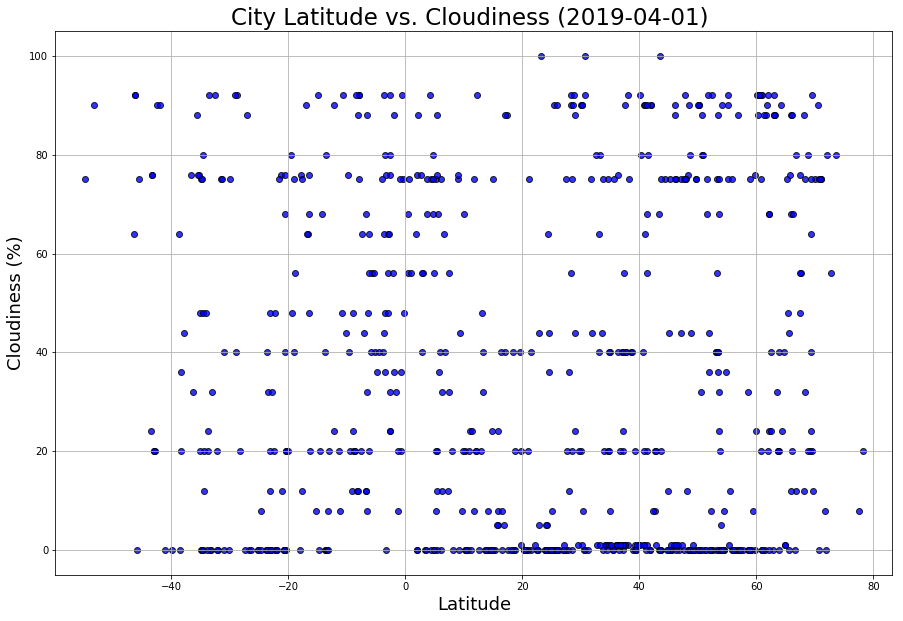

In [29]:
plt.figure(figsize=(15, 10))
plt.scatter(weather_data["Lat"].values, weather_data["Cloudiness"].values,\
                        c="Blue", alpha=0.8, linewidth=1,\
                       edgecolors="black", cmap=weather_data["City"].values, marker="o" )

plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({date}) ", fontsize=23)
plt.xlabel("Latitude", fontsize=18)
plt.ylabel("Cloudiness (%)", fontsize=18)

plt.xlim(min(weather_data["Lat"].values)-5, max(weather_data["Lat"].values)+5)
plt.ylim(min(weather_data["Cloudiness"].values)-5, max(weather_data["Cloudiness"].values)+5)

plt.savefig("../images/City_Latitud_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

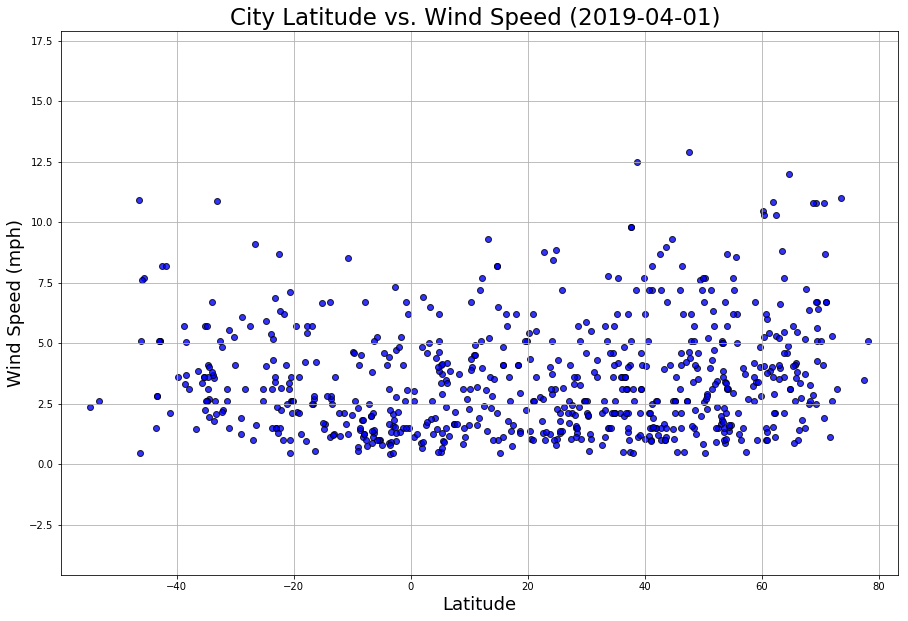

In [30]:
plt.figure(figsize=(15, 10))
plt.scatter(weather_data["Lat"].values, weather_data["Wind Speed"].values,\
                        c="Blue", alpha=0.8, linewidth=1,\
                       edgecolors="black", cmap=weather_data["City"].values, marker="o" )

plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({date}) ", fontsize=23)
plt.xlabel("Latitude", fontsize=18)
plt.ylabel("Wind Speed (mph)", fontsize=18)

plt.xlim(min(weather_data["Lat"].values)-5, max(weather_data["Lat"].values)+5)
plt.ylim(min(weather_data["Wind Speed"].values)-5, max(weather_data["Wind Speed"].values)+5)

plt.savefig("../images/City_Latitud_vs_Wind_Speed.png")

plt.show()